This project contains a few folders and files:
* data - this folder contains pre-made simulations (these are the simulations used in the plots in the documentation), and almost all of the cells use these simulations in the plots. 

* results - this is a folder to which new simulations will be saved, when generated.

* functions - this file contains all the functions used in the code such as simulations.

* plots - this file contains all the functions that plot stuff.

* RW_project - this is the main file (this current notebook), which reads the two other files, applying all the functions.


Run this cell when you start - this cell import the functions and plots, and defines some parameters that will be used in the cells ahead. you can always change the parameters to whatever you'd like, but notice that it is recommended to use a number of particles in proportion to $D$:  $n=10D$ and the decay rate in proportion to $D$:  $\kappa=D/60$ (also make sure it's an integer!).

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import functions as fnc
import plots as pts

b, w = 30, 2.2
t_f = 50
stepsize = 1
D = 300
k = int(D / 60)
n = 10 * D
thresh, n_bin = 0.35, 4
tau_d = 100
tau_s = 20

## Regular simulation

Run this cell to generate a regular simulation of Radom Walk for $n$ particles, with $\theta_p=\pi/2$.

In [ ]:
# generate a regular simulation
ptc_list, delta, theta_list = fnc.RW_simulation_constant_signal(n, t_f, stepsize, D, k, thresh, n_bin)

Once you've ran the previous cell, you can run this cell to open the simulation saved, and plot theta, delta and some histograms from different time frames along the simulation.

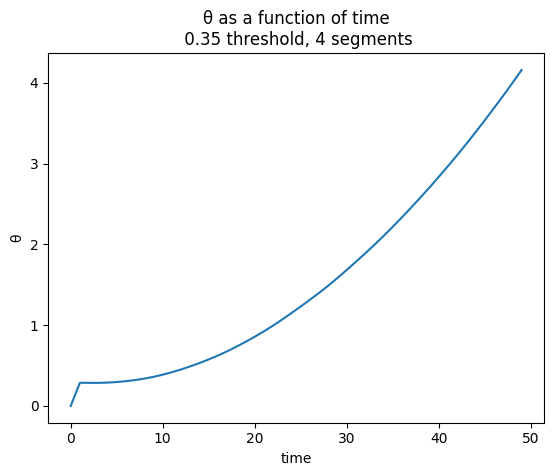

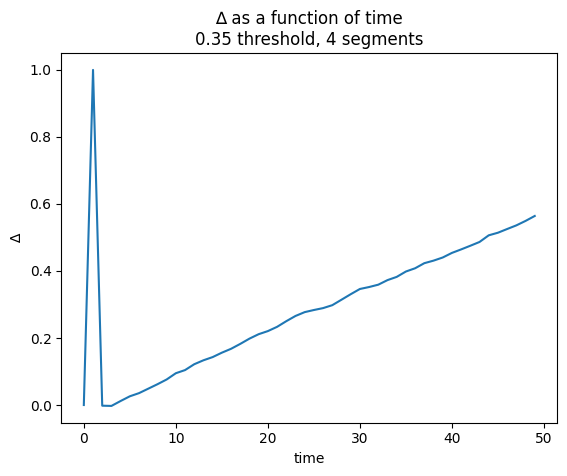

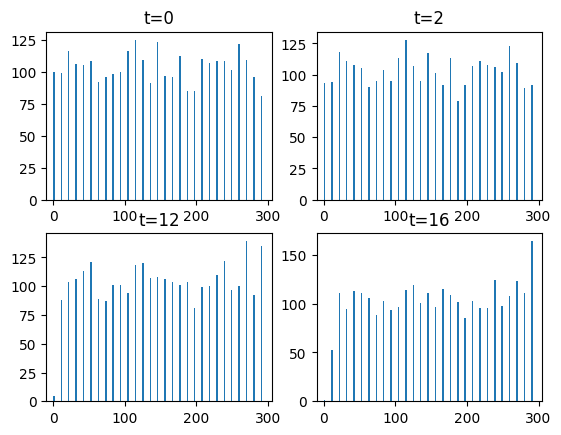

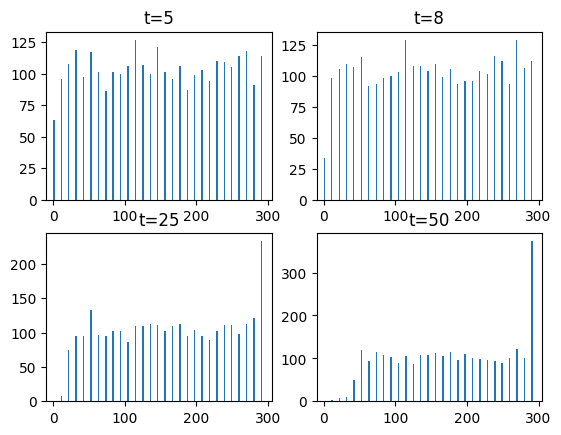

In [ ]:
# open the saved arrays
ptc_list = np.array(pd.read_csv("results/ptc_list.csv"))
delta = np.array(pd.read_csv("results/delta.csv"))
theta_list = np.array(pd.read_csv("results/theta.csv"))

# plot the angle theta, delta, and some histograms from a few frames of the simulation
pts.plot_theta_dc(t_f, theta_list, delta, thresh, n_bin)
pts.plot_RW_simulation_frames(t_f, D, ptc_list)

If you are interested in a video of the simulation, run this cell - notice it takes time to run.

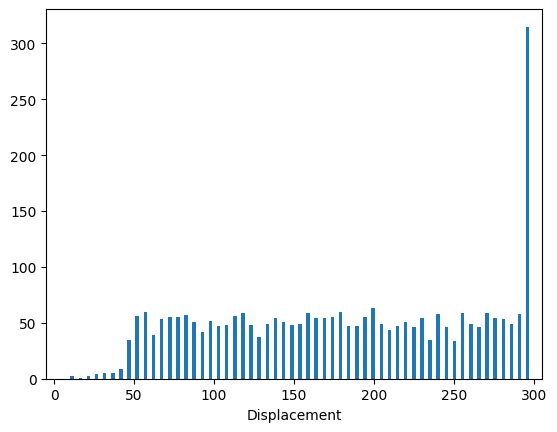

In [ ]:
# animating
fnc.animating(ptc_list, t_f, w, D)

## Examining the model

This cell plots $\theta$ from the simulation you ran above in comparison to its numerical derivative.

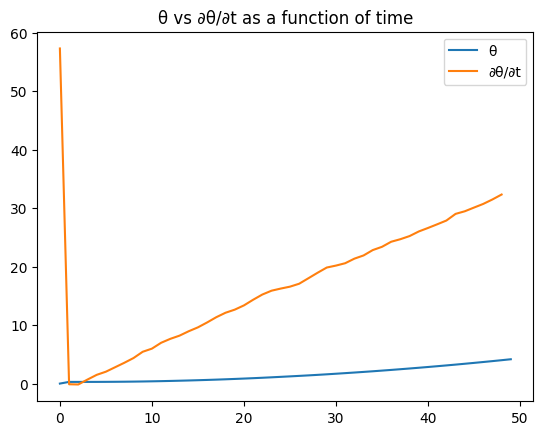

In [ ]:
# comparing theta to its numerical derivative
pts.plot_theta_vs_derivative(t_f)

Running this cell plots a legend figure with a few subplots of theta in different threshold concentrations.

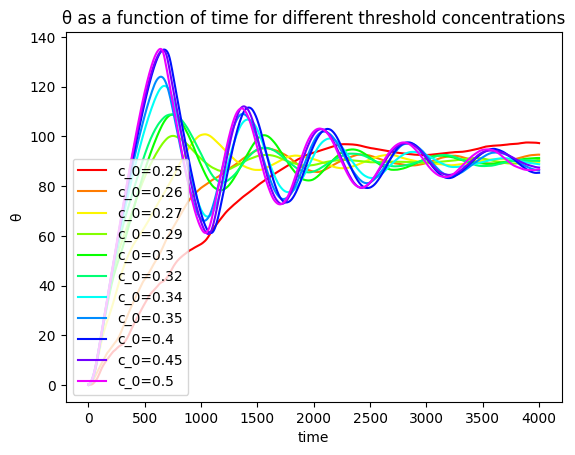

In [ ]:
# comparing theta for different threshold concentrations
c_0_list = [0.25, 0.26, 0.27, 0.29, 0.3, 0.32, 0.34, 0.35, 0.4, 0.45, 0.5]
pts.plot_theta_legend_c_0(t_f, c_0_list)

Run this cell to plot a legend figure with a few subplots of theta in different decay rates k.

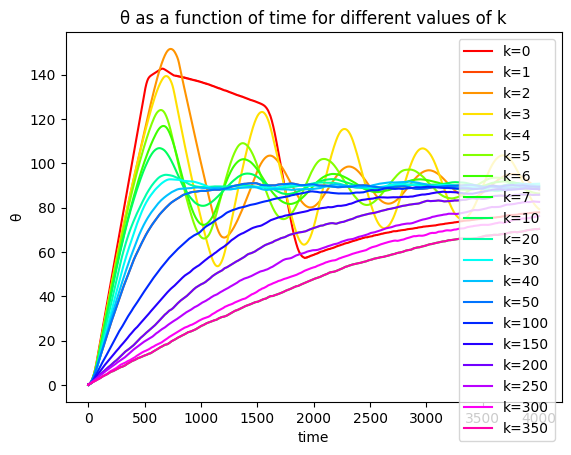

In [ ]:
# comparing theta for different k values
k_list = [0, 1, 2, 3, 4, 5, 6, 7, 10, 20, 30, 40, 50, 100, 150, 200, 250, 300, 350]
pts.plot_theta_legend_k(t_f, k_list)

Run this cell to plot a legend figure with a few subplots of theta with different lengths D.

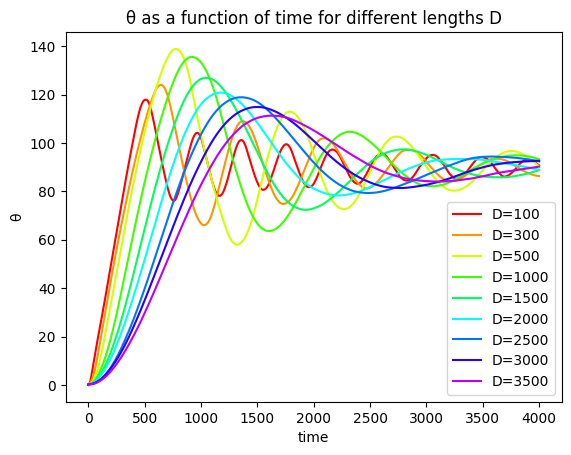

In [ ]:
# comparing theta for different D values
D_list = [100, 300, 500, 1000, 1500, 2000, 2500, 3000, 3500]
pts.plot_theta_legend_D(t_f, D_list)

Run this cell to generate a simulation with a changing signal: starting with $\theta_p=\pi/2$ for $\tau_s$ time-frames, and then the signal changes to 0 for the rest of the simulation.

In [ ]:
# one time varying signal with duration of tau_s
fnc.RW_simulation_changing_signal_once(n, t_f, stepsize, D, k, thresh, n_bin, tau_s)

OSError: Cannot save file into a non-existent directory: 'C:/Users/Noa/Desktop'

Run this cell to generate a simulation with a changing signal: starting with a signal of $\theta_p=\pi/2$ that lasts for $\tau_s$
time-frames, and then changes to 0 for a time period of $\tau_d$ time-frames, and then again another signal of $\pi/2$ that
 lasts for $\tau_s$ time-frames, and finally the signal returns to 0 for the rest of the simulation.

In [ ]:
# two varying signals witha delay increment of tau_d
fnc.RW_simulation_changing_signal_twice(n, t_f, stepsize, D, k, thresh, n_bin, tau_d)

KeyboardInterrupt: 

Run this cell to plot a legend figure with a few subplots of theta with different delay times $\tau_d$.

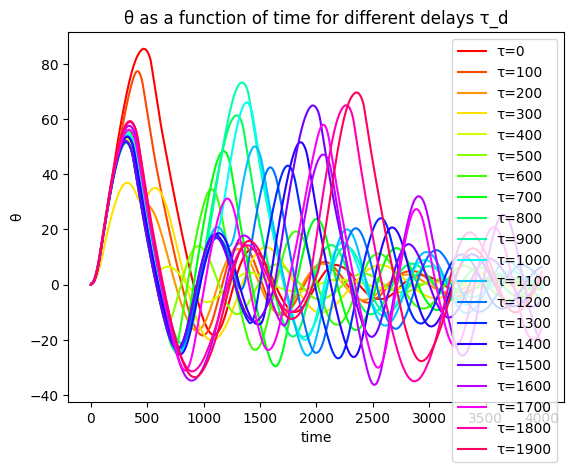

In [ ]:
# comparing theta with different delay times of two signals
tau_d_list = np.arange(0, 2000, 100)
pts.plot_theta_legend_tau_d(t_f, tau_d_list)

This cell plots a legend figure with a few subplots of $\theta$ with different signal durations $\tau_s$.

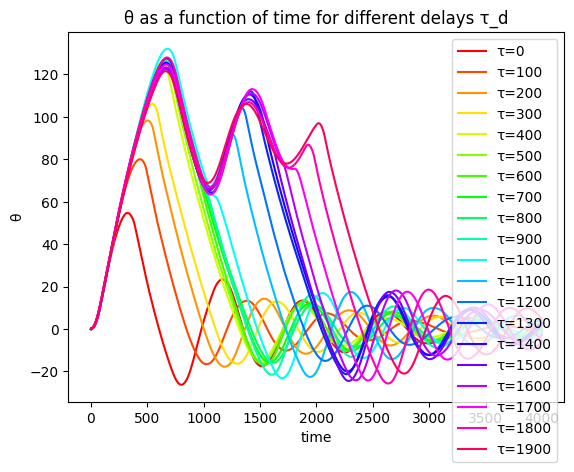

In [ ]:
# comparing theta with different delay times of one signal
tau_s_list = np.arange(0, 2000, 100)
pts.plot_theta_legend_tau_s(t_f, tau_s_list)

This cell plots $\theta$ in comparison to its numerical derivative, for different delay times $\tau_d$.

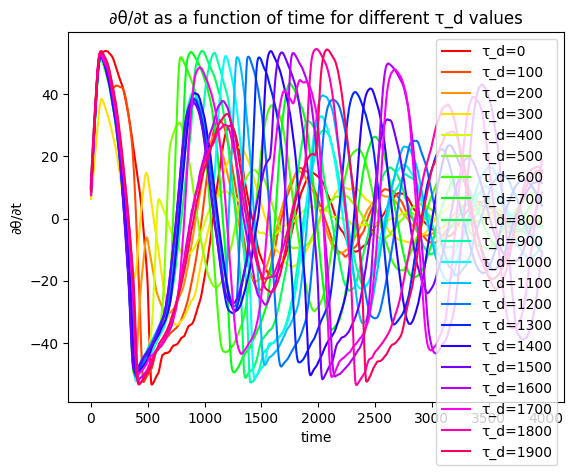

In [ ]:
# plotting the numerical derivative of theta for different values of tau_d
tau_d_list = np.arange(0, 2000, 100)
pts.plot_derivatives_tau_d(t_f, tau_d_list)

This cell plots $\theta_{max}$ and $\Delta_{max}/\Delta_{ref}$  as a function of $\tau_d$, where $\Delta_{max}\equiv[\partial_t\theta]_{max}$ and $\Delta_{ref}$ is the first maximum after a simulation of only one signal.

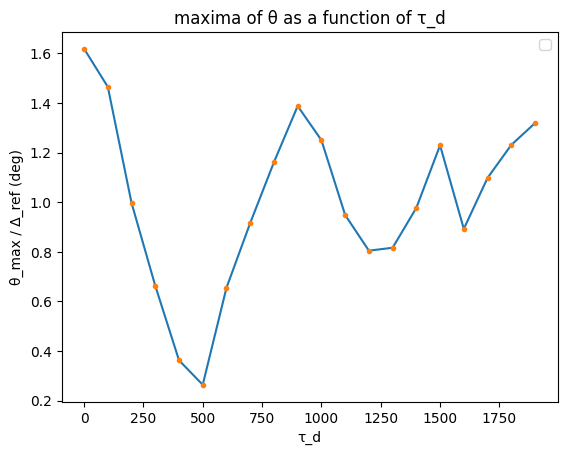

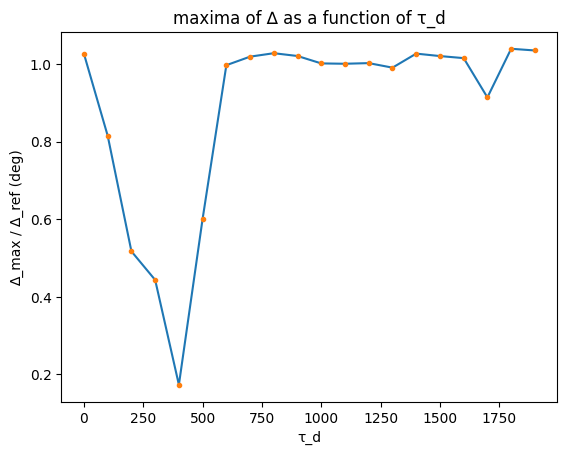

In [ ]:
tau_d_list = np.arange(0, 2000, 100)

# plotting θ_max - changing tau_d
time, peaks = fnc.theta_max_tau_d(t_f, tau_d_list)
pts.plot_theta_max_tau_d(time, peaks)

# find and plot delta_max (delta here is dθ/dt)
time, peaks = fnc.delta_max_tau_d(t_f, tau_d_list)
pts.plot_delta_max_tau_d(time, peaks)

This cell plots $\theta_{max}$ and $\Delta_{max}$  as a function of $\tau_s$, where $\Delta_{max}\equiv[\partial_t\theta]_{max}$.

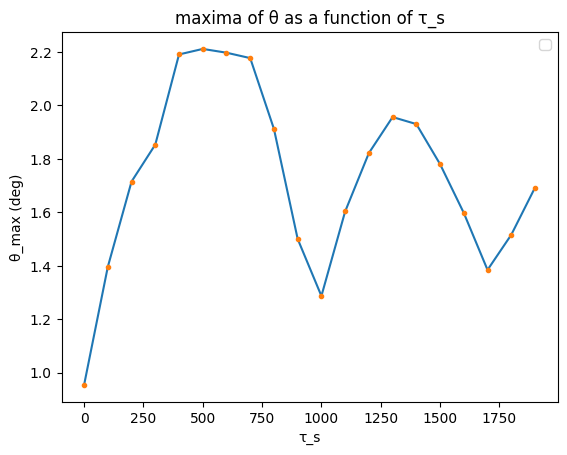

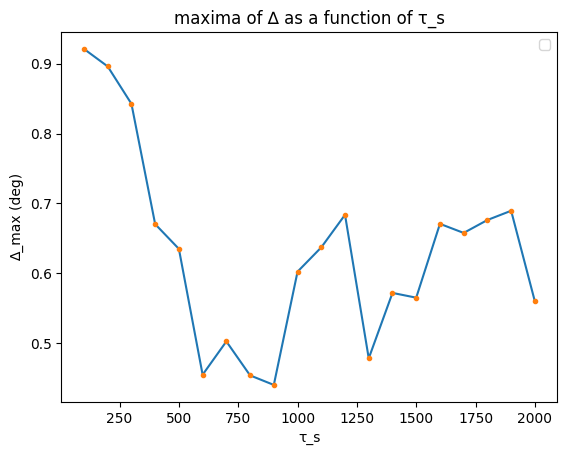

In [ ]:
tau_s_list = np.arange(0, 2000, 100)

# plotting θ_max
time, peaks = fnc.theta_max_tau_s(t_f, tau_s_list)
pts.plot_theta_max_tau_s(time, peaks)

# find and plot delta_max (delta here is dθ/dt)
time, peaks = fnc.delta_max_tau_s(t_f, tau_s_list)
pts.plot_delta_max_tau_s(time, peaks)

## Fitting the data
In this section, we average over a lot of simulations to get good results. In the "data" folder you can find the averaged simulations, but also the simulations used to average - I added them because it takes a long time to run this many simulations, so in case you need to add more simulations you wouldn't have to start from scratch.

Defining functions - run this cell in order to use them in the next cells.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# from lmfit import Model
import pandas as pd
from scipy.optimize import curve_fit
from scipy.stats import linregress


def average_data_c_0(iterations, t_f, c_0):
    """return averaged data from a bunch of simulations
    :param t_f number of time frames.
    :param index the threshold concentration used in the simulation
    :param iterations number of simulations averaged upon."""

    thetas = np.zeros((iterations, t_f))

    for i in range(1, iterations):

        thetas[i, :] = np.array(pd.read_csv(f"data/damped_harmonic_oscillator/changing_c_0/simulations/thetas_{c_0}/theta_{i}.csv"))[:, 1]

    avr_theta = np.average(thetas, axis=0)
    stdv = np.std(thetas, axis=0)

    pd.DataFrame(avr_theta).to_csv(f"results/damped_harmonic_oscillator/changing_c_0/thetas_average_c_0/theta_avr_{c_0}.csv")
    return avr_theta, stdv


def average_data_D(iterations, t_f, D):
    """return averaged data from a bunch of simulations
    :param t_f number of time frames.
    :param index the value of D used in the simulation.
    :param iterations number of simulations averaged upon."""

    thetas = np.zeros((iterations, t_f))

    for i in range(1, iterations):
        thetas[i, :] = np.array(pd.read_csv(f"data/damped_harmonic_oscillator/changing_D/simulations/thetas_{D}/theta_{i}.csv"))[:, 1]

    avr_theta = np.average(thetas, axis=0)
    stdv = np.std(thetas, axis=0)

    pd.DataFrame(avr_theta).to_csv(f"results/damped_harmonic_oscillator/changing_D/thetas_average_D/theta_avr_{D}.csv")
    return avr_theta, stdv



def harmonic_oscillator_fit_c_0(theta, c_0):
    """This function fits the imulation to a damped harmonic oscillator and plots the results along the
    original simulation"""

    def g(t, A, omega, z, phi, c):
        """fitting function for short signal - converges to 0."""
        return A * np.sin(omega * t + phi) * np.exp(- z * omega * t) + c

    t = np.arange(0, t_f, 1)
    params, covariance = curve_fit(g, t, theta, p0=[0.113412, 0.008003, 0.06542, -0.00333, 0.001897])   # initial guess that works :)


    plt.plot(t, theta, label='simulation')
    plt.plot(t, g(t, params[0], params[1], params[2], params[3], params[4]), label='fit')
    plt.xlabel("time"), plt.ylabel("θ")
    plt.title(f'Damped Harmonic Oscillator Fit, c_0={c_0}')
    plt.legend()
    plt.show()
    return params


def harmonic_oscillator_fit_D(theta, D):
    """This function fits the averaged data from the simulations to a damped harmonic
    oscillator and plots the results alongside the original simulation
    :returns an array with the fitting parameters"""

    def g(t, A, omega, z, phi, c):
        """fitting function for short signal - converges to 0."""
        return A * np.sin(omega * t + phi) * np.exp(- z * omega * t) + c

    t = np.arange(0, t_f, 1)
    params, covariance = curve_fit(g, t, theta, p0=[0.113412, 0.008003, 0.06542, -0.00333, 0.001897])   # initial guess that works :)


    plt.plot(t, theta, label='simulation')
    plt.plot(t, g(t, params[0], params[1], params[2], params[3], params[4]), label='fit')
    plt.xlabel("time"), plt.ylabel("θ")
    plt.title(f'Damped Harmonic Oscillator Fit, D={D}')
    plt.legend()
    plt.show()
    return params


def plot_fit_parameters_c_0(parameters_list):
    """this function plots the fitting parameters which were extracted from the fits"""
    c_0 = np.array(parameters_list.c_0)
    zeta = np.array(parameters_list.zeta)
    omega = np.array(parameters_list.omega)

    plt.plot(c_0, zeta)
    plt.plot(c_0, zeta, '.')
    plt.xlabel('c_0'), plt.ylabel('ξ')
    plt.title('Fitting parameter ξ(c_0) for varying threshold concentrations')
    plt.show()

    plt.plot(c_0, omega)
    plt.plot(c_0, omega, '.')
    plt.xlabel('c_0'), plt.ylabel('ω')
    plt.title('Fitting parameter ω(c_0) for varying threshold concentrations')
    plt.show()


def plot_fit_parameters_D(parameters_list):
    """this function plots the fitting parameters which were extracted from the fits"""
    D = np.array(parameters_list.D)
    zeta = np.array(parameters_list.zeta)
    omega = np.array(parameters_list.omega)

    plt.plot(D, zeta)
    plt.plot(D, zeta, '.')
    plt.xlabel('D'), plt.ylabel('ξ')
    plt.title('Fitting parameter ξ(D) for varying threshold concentrations')
    plt.show()

    plt.plot(D, omega)
    plt.plot(D, omega, '.')
    plt.xlabel('D'), plt.ylabel('ω')
    plt.title('Fitting parameter ω(D) for varying threshold concentrations')
    plt.show()

### for $c_0$

Define some parameters for the functions:

In [ ]:
c_0_list = [25, 26, 26.25, 26.5, 26.75, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]
iterations = 25
t_f = 4000
parameters = np.zeros((len(c_0_list), 6))

This cell averages over a bunch of simulations with the same $c_0$.

In [ ]:
for c_0 in c_0_list:
    average_data_c_0(iterations, t_f, c_0)

This cell fits and plots the averaged data

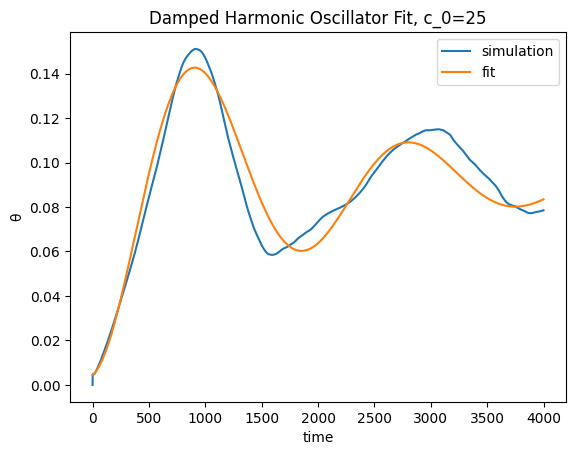

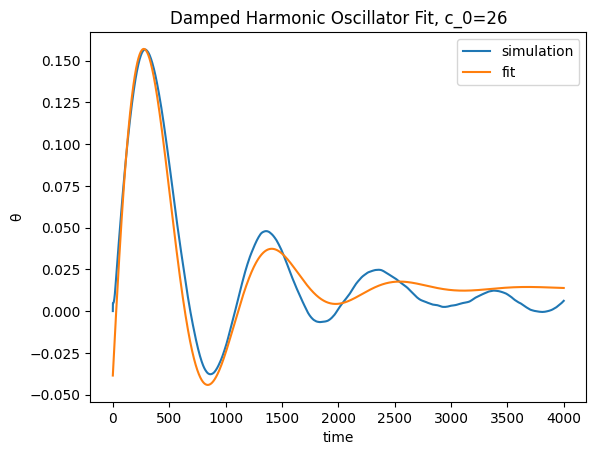

In [ ]:
for c_0 in c_0_list:
    theta = np.array(pd.read_csv(f"data/damped_harmonic_oscillator/changing_c_0/thetas_average_c_0/theta_avr_{c_0}.csv"))[:, 1]
    harmonic_oscillator_fit_c_0(theta, c_0)

This cell fits the averaged data and saves the fit parameters

In [ ]:
for j in range(len(c_0_list)):
    theta_list, index = np.array(pd.read_csv(f"data/damped_harmonic_oscillator/changing_c_0/thetas_average_c_0/theta_avr_{c_0_list[j]}.csv"))[:, 1], index_list[j]
    params = harmonic_oscillator_fit_c_0(theta_list, index)
    parameters[j, 5] = c_0_list[j]
    for i in range(5):
        parameters[j, i] = params[i]
pd.DataFrame(parameters).to_csv(f"results/damped_harmonic_oscillator/changing_c_0/fit_parameters_c_0.csv")


FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/Noa/Desktop/thetas_average/theta_avr_25.csv'

This cell plots the fit parameters extracted in the previous cell

In [ ]:
parameters_list = pd.read_csv('data/damped_harmonic_oscillator/changing_c_0/fit_parameters_c_0.csv', usecols=['c_0', 'zeta', 'omega'])
plot_fit_parameters_c_0(parameters_list)

### For $D$

Define some parameters for the functions:

In [ ]:
D_list = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700]
iterations = 25
t_f = 4000
parameters = np.zeros((len(D_list), 6))

This cell averages over a bunch of simulations with the same $D$.

In [ ]:
for D in D_list:
    average_data_D(iterations, t_f, D)

This cell fits and plots the averaged data

In [ ]:
for D in D_list:
    theta = np.array(pd.read_csv(f"data/damped_harmonic_oscillator/changing_D/thetas_average_D/theta_avr_{D}.csv"))[:, 1]
    harmonic_oscillator_fit_D(theta, D)

This cell fits the averaged data and saves the fit parameters

In [ ]:
for j in range(len(D_list)):
    theta_list, index = np.array(pd.read_csv(f"data/damped_harmonic_oscillator/changing_D/thetas_average_D/theta_avr_{D_list[j]}.csv"))[:, 1], index_list[j]
    params = harmonic_oscillator_fit_D(theta_list, index)
    parameters[j, 5] = D_list[j]
    for i in range(5):
        parameters[j, i] = params[i]
pd.DataFrame(parameters).to_csv(f"results/damped_harmonic_oscillator/changing_D/fit_parameters_D.csv")


This cell plots the fit parameters extracted in the previous cell

In [ ]:
parameters_list = pd.read_csv('data/damped_harmonic_oscillator/changing_D/fit_parameters_D.csv', usecols=['D', 'zeta', 'omega'])
plot_fit_parameters_D(parameters_list)

### Fitting the fit parameters ($\xi, \omega$) of the simulations with $D$.

Read the data of the fit parameters

In [ ]:
parameters_list = pd.read_csv('data/damped_harmonic_oscillator/changing_D/fit_parameters_D.csv', usecols=['D', 'zeta', 'omega'])
D = np.array(parameters_list.D)
zeta = np.array(parameters_list.zeta)
omega = np.array(parameters_list.omega)

Fitting the fit parameters $\xi(D)$ to a linear fit

In [ ]:
# linear fit for ξ
result = linregress(D, zeta)
slope = result.slope
intercept = result.intercept
print(f"linear fit: y={slope}x + {intercept}")

# plot the fit
plt.plot(D, zeta, 'o', label='original data')
plt.plot(D, intercept + slope * D, label='fit')
plt.title("Linear fit - ξ(D)"), plt.xlabel("D"), plt.ylabel("ξ")
plt.legend()
plt.show()

Fitting the fit parameter $\omega(D)$ to an exponntial fit

In [ ]:
# exponential fit for ω
def exp_fit(D, A, a, c):
    return A * np.exp(a * D) + c

params, covariance = curve_fit(exp_fit, D, omega, p0=[0.01489, -3.66348e-3, 0.00376])
print(params)

# plot the fit
plt.plot(D, omega, '.', label='simulation')
plt.plot(D, exp_fit(D, params[0], params[1], params[2]), label='fit')
plt.xlabel("D"), plt.ylabel("ω(D)")
plt.title('Exponential fit - ω(D)')
plt.legend()
plt.show()